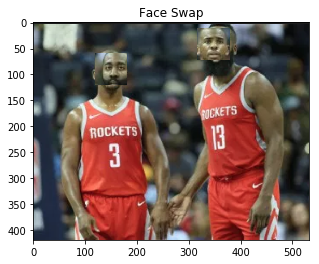

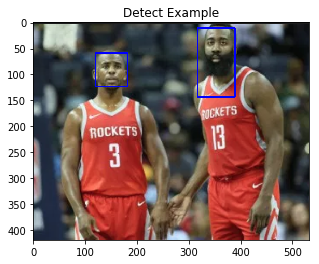

In [7]:
# Libraries needed for program
import cv2
import numpy as np
import matplotlib.pyplot as plt


#Detect the Faces
'''
Function takes in the grayscale version of the image, returns a matrix
containing all faces in the format -- [x y w h] with x, y refering to the
top left point of the rectangle bounding the correspond face
'''
def detect(gray):
    #Load frontal face features from xml file (previously trained)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    return faces

#Draw Rectangles
def drawRectangles(frame, faces):
    for (x, y, w, h) in faces: #Loop through each face
        cv2.rectangle(frame, (x,y), (x+w, h+h), (255, 0, 0), 2)
        #Parameters of function (image, top left coordinates, bottom right coordinate
        # color of rectangle, thickness of rectangle)

#Swap the pixels in the detected rectangles, (thus swapping faces)
def swap(frame, faces):
    Paul = faces[0]
    Harden = faces[1]
    for x in range(59, 121):
        for y in range(120, 182):
            #Have to pass value by copy to make swap
            temp = [ frame[x][y][0], frame[x][y][1], frame[x][y][2] ]
            #3 color channels(RGB), this is why we access [0],[1], and [2] of the image
            frame[x][y] = frame[x-48][y+197]
            frame[x-48][y+197] = temp
    return frame

image = cv2.imread('./images/PaulHarden.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Do some color transformations
faces = detect(gray)
canvas = swap(image, faces)
b,g,r = cv2.split(canvas)
canvas = cv2.merge([r,g,b])
plt.imshow(canvas)
plt.title('Face Swap')
plt.show()

#Detect Example
detectImage = cv2.imread('./images/PaulHarden.jpg')
gray = cv2.cvtColor(detectImage, cv2.COLOR_BGR2GRAY)
faces = detect(gray)
drawRectangles(detectImage, faces)
b,g,r = cv2.split(detectImage)
detectImage = cv2.merge([r,g,b])
plt.imshow(detectImage)
plt.title('Detect Example')
plt.show()